In [2]:
import matplotlib.pyplot as plt
import numpy as np
from pipic import consts

pulseDuration_FWHM = 16e-15

pulseWidth_x = (pulseDuration_FWHM/2.355)*consts.light_velocity # [cm]
spotsize = 2*pulseWidth_x
print(spotsize)


wl = 1e-4  # [cm]
timestep = 1e-1 / (2 * np.pi * consts.light_velocity / wl)

density = np.load("2D_densityData (Bra).npy")
emField = np.load("3D_FieldDataFinal.npy")





0.0004073613017409767


(569, 64, 64, 256)
(40, 64, 64, 256, 6)
0.011140846016432676
7500


/tmp/ipykernel_182621/102909964.py:14: RuntimeWarning: divide by zero encountered in log
  im2 = ax[1].contourf(X,Y,np.log(density[nr, :, density.shape[2]//2, :]) ,100)


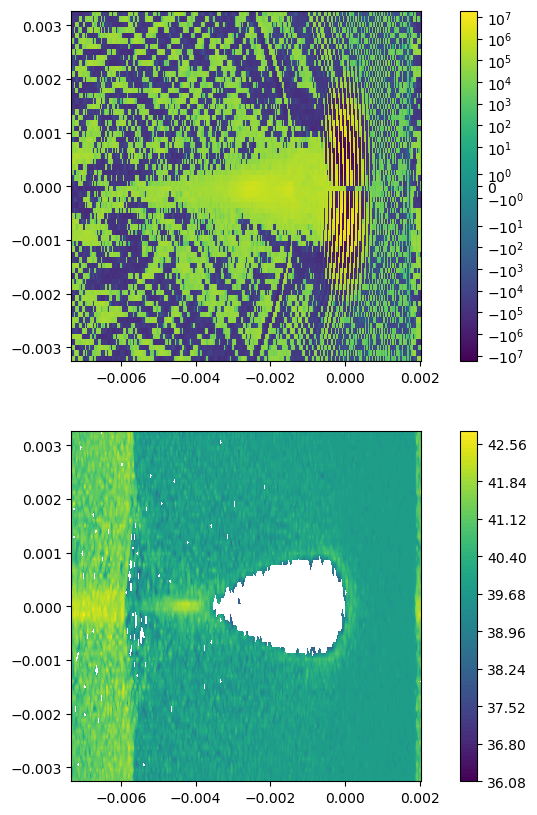

In [3]:
print(density.shape)
print(emField.shape)

nx, xmin, xmax = 2**6, -8*spotsize, 8*spotsize
ny, ymin, ymax = 2**6, -8*spotsize, 8*spotsize
nz, zmin, zmax = 2**8, -18*spotsize, 5*spotsize
nr = 28
#print(np.nonzero(density[:, 16, 16, 32]))
fig, ax = plt.subplots(2,1, figsize=(10,10))

X, Y = np.meshgrid(np.linspace(zmin, zmax, density.shape[3]), np.linspace(xmin, xmax, density.shape[1]))

#ax.pcolormesh(X,Y,np.log(density[nr, :, density.shape[2]//2, :]), shading="gouraud" , antialiased=True)
im2 = ax[1].contourf(X,Y,np.log(density[nr, :, density.shape[2]//2, :]) ,100)
im = ax[0].imshow(emField[nr, :, density.shape[2]//2, :, 2], norm="symlog", extent=(zmin, zmax, xmin, xmax), aspect="auto", interpolation="none")
ax[0].set_box_aspect(1)
ax[1].set_box_aspect(1)
fig.colorbar(im)
fig.colorbar(im2)


#im = ax.imshow(density[nr, :, density.shape[2]//2, :], norm="log", extent=(zmin, xmax, xmin, xmax), aspect="auto", interpolation="none")
#plt.colorbar(im)


print(consts.light_velocity * 250 * timestep * nr)
print(30*250)
plt.show()



/tmp/ipykernel_182621/2287711421.py:2: RuntimeWarning: divide by zero encountered in log
  im2 = ax.contourf(X[:, :-5],Y[:, :-5],np.log(density[nr, :, density.shape[2]//2, :-5]) ,100, cmap="twilight")


[<matplotlib.contour.QuadContourSet object at 0x72b06ebad070>, <matplotlib.spines.Spine object at 0x72b06edf6360>, <matplotlib.spines.Spine object at 0x72b06ed28ad0>, <matplotlib.spines.Spine object at 0x72b06ed04bc0>, <matplotlib.spines.Spine object at 0x72b06ed06240>, <matplotlib.axis.XAxis object at 0x72b06ed04fe0>, <matplotlib.axis.YAxis object at 0x72b06ed06660>, Text(0.5, 1.0, ''), Text(0.0, 1.0, ''), Text(1.0, 1.0, ''), <matplotlib.patches.Rectangle object at 0x72b06ef6ee70>]


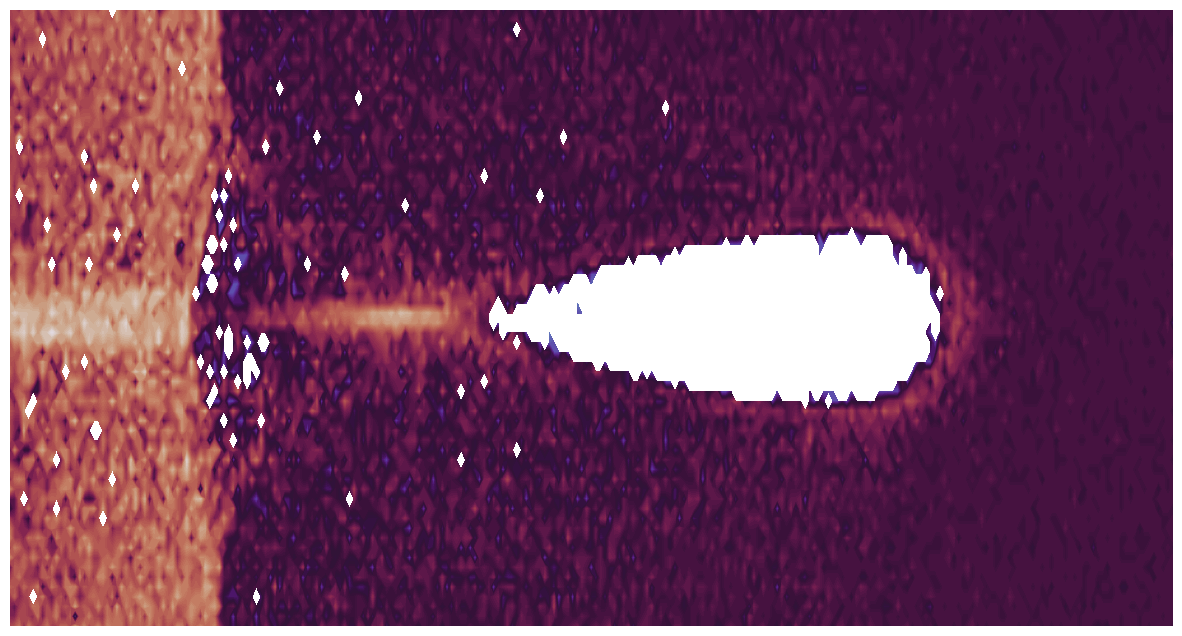

In [4]:
fig, ax = plt.subplots(figsize=(10*1.5,8))
im2 = ax.contourf(X[:, :-5],Y[:, :-5],np.log(density[nr, :, density.shape[2]//2, :-5]) ,100, cmap="twilight")
ax.set_axis_off()
print(ax.get_children())
fig.savefig("frontpage.png", dpi=400)


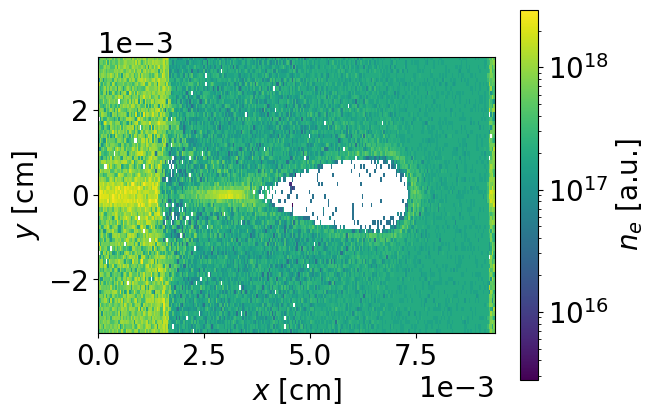

In [8]:
fig, ax = plt.subplots()
plt.rcParams.update({'font.size': 20})
data = np.ma.masked_where(density[nr, density.shape[2] // 2, :, :] <= 0, density[nr, density.shape[2] // 2, :, :])
im2 = ax.imshow(data, norm="log", extent=(zmin-zmin, zmax-zmin, xmin, xmax), interpolation="none")
ax.ticklabel_format(axis='both', style='sci', scilimits=(0, 0))
ax.set_xlabel("$x$ [cm]")
ax.set_ylabel("$y$ [cm]")
cbar = fig.colorbar(im2)
cbar.set_label("$n_e$ [a.u.]")

fig.savefig("3dplot.png", dpi=400)

Text(0, 0.5, '$y$ [cm]')

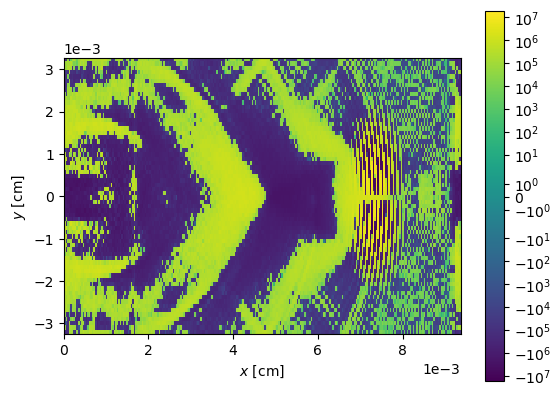

In [6]:
fig, ax = plt.subplots()
im = ax.imshow(emField[nr, :, density.shape[2]//2, :, 5], norm="symlog", extent=(zmin-zmin, zmax-zmin, ymin, ymax), interpolation="none")
ax.ticklabel_format(axis='both', style='sci', scilimits=(0, 0))
cbar = fig.colorbar(im)


ax.set_xlabel("$x$ [cm]")
ax.set_ylabel("$y$ [cm]")